# Resistor inductor capacitor circuit calculator

This is a calculator for the angular-frequency, time-constant and their phases of an [RLC circuit](https://en.wikipedia.org/wiki/RLC_circuit).

## Background

Generic model of a circuit of resistor inductor and capacitor connected in series.

$$L\frac{\partial^2 f(t)}{\partial t^2} + R\frac{\partial f(t)}{\partial t} + \frac{1}C f(t) = 0$$

This is actually the [Kirchhoff's voltage law](https://en.wikipedia.org/wiki/Kirchhoff%27s_circuit_laws), where individual components are respectively the voltages over the inductor, resistor and capacitor.

The solution for the differential equation is the Euler's function:

$$e^{\Omega t+\Phi}$$

where:

$\Omega = -\frac{1}\tau + i\omega \to$ the complex angular frequency (combined time constant and frequency)

$\Phi = -\frac{1}{{\tau}_0} + i\phi \to$ the phase of the complex angular frequency

After replacing in the equation and differentiating, we got:

$$L\Omega^2 e^{\Omega t+\Phi} + R\Omega e^{\Omega t+\Phi} + \frac{e^{\Omega t+\Phi}}{C} = 0 \implies$$

$$\implies L\Omega^2 + R\Omega + \frac{1}{C} = 0$$

This is a quadratic equation, where the solutions are:

$$\Omega = \frac{ -R \pm\sqrt{R^2-4\frac{L}C} }{2L}$$

> In case of oscillating system ($R^2 < 4\frac{L}C$), these solutions are complex numbers, that can be broken down into:

$$\begin{cases}\Omega_r = -\frac{1}\tau = -\frac{R}{2L} \\ \Omega_i = \omega = \pm\frac{\sqrt{4\frac{L}C-R^2}}{2L}\end{cases}$$

## Circuit parameters calculator

In [1]:
# Circuit parameters
resistance = 10     # 10 Ohm
inductance = .1     # 100 milli-Henry
capacitance = 15e-6 # 15 micro-Farads

# Initial conditions
capacitor_voltage0 = 5      # 5 Volts
inductor_current0 = 0

> This mimics the schematic: [Falstad](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWEBOWkwHYwGYeIExgAcE+GISALNhQKYC0YYAUAE7gYBsIRkI2RSjz58wkZgHcO3XtP4J8UZgGN+g+YszdsCqFDRwwlZCdNnz+hCaIljWIp1PkEzADZqhsgUJ2KR0CBh4THxkBEpKDHxOXkhKBHJxAHs9MG4+SkgTcH9AkHT+ED8iwpo+GmxmARKAMTyg+HR9YKbGEABhAEMAB07lAEsAF06AO2VaKqJCur0giDBYCDaASRGAEwBXZWGxieq+GdEcpYgAJVoAZ36LnfHmIA)

### Initial conditions

#### Obtain the Euler's phase ($\Phi$) from voltage and current

Relation between the initial voltage on the capacitor and the phase ($\Phi$):

$V_C(t) = \frac{1}C e^{\Omega t + \Phi} \implies C V_C(t) = e^{\Omega t + \Phi}$

$$\Phi = \log(C V_C(t)) - \Omega t$$

> Note that $V_C(t)$ is the complex voltage value ($V_{Cr} + iV_{Ci}$), but we know its real component only
>
> As $V_{C0}$ is a complex number, $\Phi$ is also complex and includes both ${\tau}_0$ and $\phi$

Relation between the initial current through the inductor and the phase ($\Phi$)

$I_L(t) = \frac{\partial e^{\Omega t + \Phi}}{\partial t} \implies I_L(t) = \Omega e^{\Omega t + \Phi} \implies \frac{I_L(t)}{\Omega} = e^{\Omega t + \Phi}$

$$\Phi = \log\frac{I_L(t)}{\Omega} - \Omega t$$

> Note that $I_L(t)$ is the complex current value ($I_{Lr} + iI_{Li}$), but we know its real component only

#### Obtain the imaginary components of voltage and current

The imaginary compoments of $I_L(t)$ and $V_C(t)$ can be obtained from:

$\frac{I_L(t)}{\Omega} = e^{\Omega t + \Phi} = C V_C(t) \implies I_L(t) = \Omega C V_C(t)$

Split this complex-number equation into two real-number equations:

$I_{Lr} + iI_{Li} = (\Omega_r + i\Omega_i) C(V_{Cr} + iV_{Ci}) \implies$

$$\begin{cases} I_{Lr} = C (\Omega_r V_{Cr} - \Omega_i \underline{V_{Ci}}) \\ \underline{I_{Li}} = C (\Omega_r \underline{V_{Ci}} + \Omega_i V_{Cr}) \end{cases}$$

here the unknowns are $\underline{underlined}$

$\implies V_{Ci} = \frac{\Omega_r V_{Cr}}{\Omega_i} - \frac{I_{Lr}}{C\Omega_i} = \frac{\Omega_r C V_{Cr} - I_{Lr}}{C \Omega_i}$
$\implies \Phi = \log(C V_{Cr} + i \frac{\Omega_r C V_{Cr} - I_{Lr}}{\Omega_i}) - \Omega t$

The $C V_{Cr}$ is the amount of charge in capacitor $Q_{Cr}$ (real-component), thus:

$$\Phi = \log(Q_{Cr} + i \frac{\Omega_r Q_{Cr} - I_{Lr}}{\Omega_i}) - \Omega t$$

> Note that this is defined for $\Omega_i = \omega \ne 0$, i.e. oscillating system only

#### Obtain the Euler's phase for non-oscillating system

For non-oscillating system, $\Omega_i=0$ and $I_{Li}=V_{Ci}=0$:

$$\Phi = \log(\frac{I_{Lr}}{\Omega}) - \Omega t$$

> Here $V_{Cr}$/$Q_{Cr}$ is NOT an initial condition, but a dependant result $Q_{Cr} = \frac{I_{Lr}}{\Omega}$.
> To properly model such system, the complete $e^{\Omega_1 t + \Phi_1} + e^{\Omega_2 t + \Phi_2}$ solution for the differential equation must be used.
> Where $\Omega_{1,2}$ are both solutions of the quadratic equation, then both $I_{Lr}, Q_{Cr}$ can be used to calculate $\Phi_{1,2}$.

In [2]:
# Circuit parameters
import cmath

print(f'Solutions for R {resistance}, L {inductance}, C {capacitance}')

def solve_quadratic(a: complex, b: complex, c: complex) -> list[complex]:
    """Calculate the two solutions of quadratic equation"""
    sqrt = cmath.sqrt(b**2 - 4*a*c)
    return [(-b + sq) / (2*a) for sq in (sqrt, -sqrt)]

def calc_phases(q_c: float, i_l: float, omegas: list[complex], t:float = 0) -> list[complex]:
    """Calculate the initial Euler's phase"""
    # In case of non-oscillating system (omega.imag==0),
    # the capacitor's charge must be later adjusted
    return [cmath.log(
                complex(q_c, (omega.real * q_c - i_l) / omega.imag) if omega.imag else i_l / omega
                ) - omega * t if omega.imag or i_l else -cmath.inf for omega in omegas]

def adjust_phase(omega: complex, phase: complex, t:float) -> complex:
    """Adjust the Euler's phase to be closer to a time"""
    pers = (t * abs(omega.imag) - phase.imag) // (2 * cmath.pi)
    return phase + 2j * cmath.pi * pers

omegas = solve_quadratic(inductance, resistance, 1/capacitance)
phases = calc_phases(capacitance * capacitor_voltage0, inductor_current0, omegas)

def print_parameters(capacitor_voltage, inductor_current, omegas, phases):
    """Print the circuit parameters in various formats"""
    print(f'  Initial: C voltage {capacitor_voltage}, L current {inductor_current}')
    for omega, phase in zip(omegas, phases):
        print(f'  Complex omega {omega}:')
        print(f'    dampering: attenuation {-omega.real} nepers/sec, tau {-1/omega.real} sec')
        print(f'    oscillation: frequency {omega.imag/(2*cmath.pi)} Hz, period {2*cmath.pi/omega.imag if omega.imag else "INF"} sec')
        print(f'    derivative rotation angle: {cmath.log(omega).imag * 180 / cmath.pi} degrees')
        print(f'    phase: {phase}:')
        print(f'      dampering: attenuation0 {-phase.real} nepers/sec, tau0: {-1/phase.real} sec')
        print(f'      angle: {phase.imag * 180 / cmath.pi} degrees')
print_parameters(capacitor_voltage0, inductor_current0, omegas, phases)


Solutions for R 10, L 0.1, C 1.5e-05
  Initial: C voltage 5, L current 0
  Complex omega (-50+814.9642118931769j):
    dampering: attenuation 50.0 nepers/sec, tau 0.02 sec
    oscillation: frequency 129.7055827657899 Hz, period 0.007709768374470863 sec
    derivative rotation angle: 93.51083221160036 degrees
    phase: (-9.496143919989107-0.061275581577500224j):
      dampering: attenuation0 9.496143919989107 nepers/sec, tau0: 0.1053059018929809 sec
      angle: -3.510832211600342 degrees
  Complex omega (-50-814.9642118931769j):
    dampering: attenuation 50.0 nepers/sec, tau 0.02 sec
    oscillation: frequency -129.7055827657899 Hz, period -0.007709768374470863 sec
    derivative rotation angle: -93.51083221160036 degrees
    phase: (-9.496143919989107+0.061275581577500224j):
      dampering: attenuation0 9.496143919989107 nepers/sec, tau0: 0.1053059018929809 sec
      angle: 3.510832211600342 degrees


### Voltage / current diagram

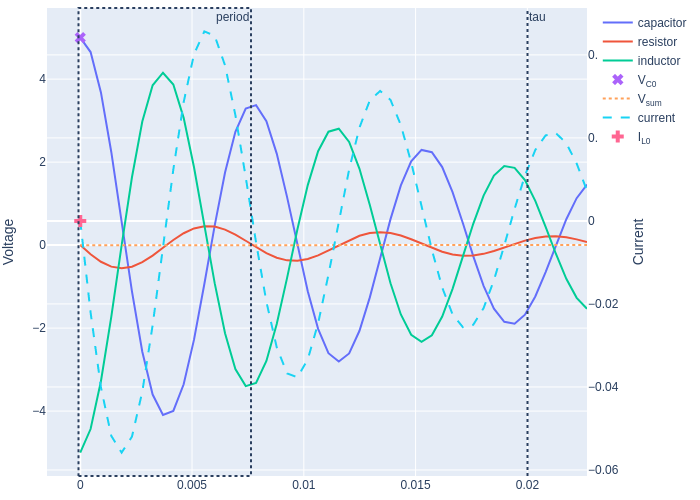

In [3]:
# Voltage diagrams
import plotly.graph_objects as go

# Default plotly figure parameters
DEF_FIGURE={'layout': {'margin': {'b': 8, 'l': 8, 'r': 8, 't': 8}}}

def calc_poly(coefs: list[complex], t: float) -> complex:
    """Polynomial for the Euler's formula exponent"""
    return sum(c * t ** i for i, c in enumerate(coefs))

def calc_euler_deriv(euler_omega: complex, euler_phi: complex, t: float, lvl: int=0) -> complex:
    """Euler formula from complex frequency and phase"""
    return euler_omega ** lvl * cmath.exp(calc_poly([euler_phi, euler_omega], t))

# Use the first omega/phase solution only
omega, phase = omegas[0], phases[0]

# Select time range: 'pi' tau-s or 1-3 oscillation periods
per = cmath.pi / abs(omega.real) if omega.real else 0
if omega.imag:
    per = max(per, 2*cmath.pi / abs(omega.imag))
    per = min(per, 6*cmath.pi / abs(omega.imag))
t_range = [1 * per * t / 50 for t in range(50)]

# Obtain first 3 derivatives
deriv_vals = []
for lvl in range(3):
    deriv_vals.append([calc_euler_deriv(omega, phase, t, lvl) for t in t_range])

# Figure with canvas
fig = go.Figure(**DEF_FIGURE)
def fig_canvas(omega, phase, base_t=None):
    """Figure canvas with tau and oscillation period"""
    if base_t is not None:
        phase = adjust_phase(omega, phase, base_t)
        fig.add_vline(base_t, line_dash='dot', annotation_text='base')
    else:
        base_t = 0
    if omega.real:
        fig.add_vline(1 / abs(omega.real) + base_t, line_dash='dot', annotation_text='tau')
    if omega.imag:
        per = 1 / abs(omega.imag)
        fig.add_vrect(phase.imag * per, (phase.imag + 2*cmath.pi) * per, line_dash='dot', annotation_text='period')
fig_canvas(omega, phase)

# Voltages
voltages = {
    'capacitor': [v.real / capacitance for v in deriv_vals[0]],
    'resistor': [v.real * resistance for v in deriv_vals[1]],
    'inductor': [v.real * inductance for v in deriv_vals[2]],
}
for n, vals in voltages.items():
    fig.add_scatter(x=t_range, y=vals, name=n)
fig.add_scatter(x=t_range[:1], y=[capacitor_voltage0], name='V<sub>C0</sub>',
        mode='markers', marker_size=10, marker_symbol='x')
# Sum of voltages, must be zero according to Kirchhoff's law
v_sum = [sum(vals) for vals in zip(*voltages.values())]
fig.add_scatter(x=t_range, y=v_sum, name='V<sub>sum</sub>', line_dash='dot')
# Current
current = [v.real for v in deriv_vals[1]]
fig.add_scatter(x=t_range, y=current, name='current', yaxis='y2', line_dash='dash')
fig.add_scatter(x=t_range[:1], y=[inductor_current0], name='I<sub>L0</sub>', yaxis='y2',
        mode='markers', marker_size=10, marker_symbol='cross')

fig.update_layout(
        yaxis=dict(title='Voltage',
        ),
        yaxis2=dict(title='Current', overlaying='y', side='right'),
    )
fig.show()

### Euler's function diagram

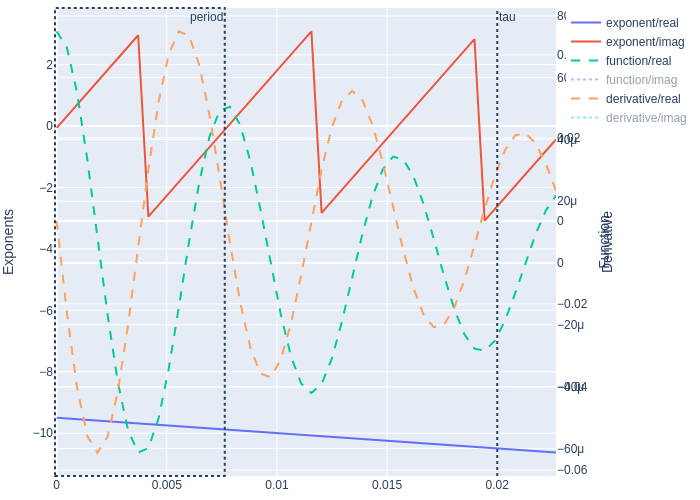

In [4]:
# Euler's function exponent diagram

# Figure with canvas
fig = go.Figure(**DEF_FIGURE)
fig_canvas(omega, phase)

def draw_euler(fig):
    """Draw Euler's exponent, function and derivative"""
    # Exponent value
    exponent = [cmath.log(v) for v in deriv_vals[0]]
    fig.add_scatter(x=t_range, y=[v.real for v in exponent], name='exponent/real')
    fig.add_scatter(x=t_range, y=[v.imag for v in exponent], name='exponent/imag')
    # Final function value
    fig.add_scatter(x=t_range, y=[v.real for v in deriv_vals[0]], line_dash='dash', name='function/real', yaxis='y2')
    fig.add_scatter(x=t_range, y=[v.imag for v in deriv_vals[0]], line_dash='dot', name='function/imag',
            yaxis='y2', visible='legendonly')
    # Final derivative value
    fig.add_scatter(x=t_range, y=[v.real for v in deriv_vals[1]], line_dash='dash', name='derivative/real', yaxis='y3')
    fig.add_scatter(x=t_range, y=[v.imag for v in deriv_vals[1]], line_dash='dot', name='derivative/imag',
            yaxis='y3', visible='legendonly')

    fig.update_layout(
            yaxis=dict(title='Exponents'),
            yaxis2=dict(title='Function', overlaying='y', side='right'),
            yaxis3=dict(title='Derivative', overlaying='y', side='right'),
        )
draw_euler(fig)
fig.show()

## Change circuit parameters

When the some of the circuit parameters are changed during its operation, this results in a change in the differential equation.
The new solutions, result in a change of the Euler's function, but should keep the capacitor voltage/charge and the inductor current continuous.
This is achieved by selecting the initial conditions (Euler's phase), in order to have same values in these parameters, as left by the
previous function.

Here the capacitor's voltages before and after the change are $V_{C0}(t)$ and $V_{C1}(t)$, inductor's currents are $I_{L0}(t)$ and $I_{L1}(t)$.
The moment of change (shock time) is $t_1$:

$$\begin{cases}V_{C1}(t_1) = V_{C0}(t_1) = \frac{1}C e^{\Omega_0 t_1+\Phi_0} \\
I_{L1}(t_1) = I_{L0}(t_1) = \Omega_0 e^{\Omega_0 t_1+\Phi_0}\end{cases}$$

In other words, the new phase $\Phi_1$ must be calculated by using the new $\Omega_1$, but the old $V_{C0}$ and $I_{L0}$ at $t_1$.

> This mimics the scematic: [Falstad](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWEBOWkwHYwGYeIExgAcEALPiEqdpQKYC0YYAUAE4j76kcIBsHXcPiJQUkZgGMQ2It3x8BchZCho4YUsi3aduypWYAbabKEiZS-ipgRrbRWZPcww0WHEA3EERXz+P8F4VbiR3fWtVFkwRMCCefliVRJAE1Xh1URgM93TrWAp8PPRQhmQoZgB3Rz9vX2VK2sCk12TxKo1nFtJnOLbwburBFxE+5JrOS3KABwcai0dbcoB7cBBuYMgtcOhF1Jp9jlEKGiZymVWAMUWs9Ns1dwhGEABhAEMp14kASwAXV4A7CS0ZjnChXTKwCBgSEgJ4ASX+ABMAK4SP6A4HnFTgpLgdCwiAAJVoAGcviT0UDmEA)


In [5]:
# New circuit parameters
resistance = 100    # 100 Ohm

# Change at the middle of range
shock_idx = len(t_range) // 2 - 3   # ~10ms
shock_t = t_range[shock_idx]

# Keep capacitor voltage and inductor current
capacitor_voltage1 = deriv_vals[0][shock_idx].real / capacitance
inductor_current1 = deriv_vals[1][shock_idx].real

# Duplicate all values at the shock-point
for lst in (t_range, *voltages.values(), current, *deriv_vals):
    lst[shock_idx+1:] = lst[shock_idx:]
shock_idx += 1

# Circuit parameters
print(f'Solutions for R {resistance}, L {inductance}, C {capacitance}')

omegas = solve_quadratic(inductance, resistance, 1/capacitance)
phases = calc_phases(capacitance * capacitor_voltage1, inductor_current1, omegas, shock_t)

print_parameters(capacitor_voltage1, inductor_current1, omegas, phases)

Solutions for R 100, L 0.1, C 1.5e-05
  Initial: C voltage -1.1130005481018503, L current -0.03337402542062619
  Complex omega (-500+645.4972243679028j):
    dampering: attenuation 500.0 nepers/sec, tau 0.002 sec
    oscillation: frequency 102.73407401024997 Hz, period 0.009733868822336667 sec
    derivative rotation angle: 127.76124390703504 degrees
    phase: (-4.526018551272416-4.745587636838345j):
      dampering: attenuation0 4.526018551272416 nepers/sec, tau0: 0.2209447417573811 sec
      angle: -271.9021429002992 degrees
  Complex omega (-500-645.4972243679028j):
    dampering: attenuation 500.0 nepers/sec, tau 0.002 sec
    oscillation: frequency -102.73407401024997 Hz, period -0.009733868822336667 sec
    derivative rotation angle: -127.76124390703504 degrees
    phase: (-4.526018551272416+4.745587636838345j):
      dampering: attenuation0 4.526018551272416 nepers/sec, tau0: 0.2209447417573811 sec
      angle: 271.9021429002992 degrees


### Voltage / current diagram

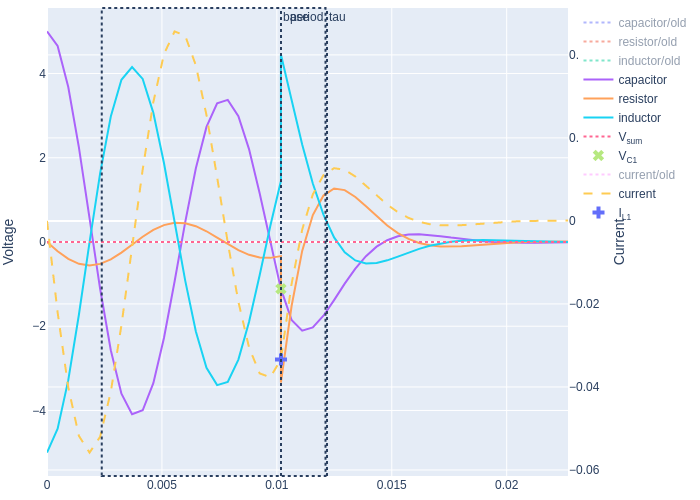

In [6]:
# Voltage diagrams

# Use the first omega/phase solution only
omega, phase = omegas[0], phases[0]

# Update the derivatives
for lvl, deriv in enumerate(deriv_vals):
    for idx in range(shock_idx, len(deriv)):
        deriv[idx] = calc_euler_deriv(omega, phase, t_range[idx], lvl)

# Figure with canvas
fig = go.Figure(**DEF_FIGURE)
fig_canvas(omega, phase, shock_t)

# Old voltages
for n, vals in voltages.items():
    fig.add_scatter(x=t_range[shock_idx:], y=vals[shock_idx:], name=n + '/old', line_dash='dot',
            visible='legendonly')
# Update voltages after 'shock_t'
voltages['capacitor'][shock_idx:] = [v.real / capacitance for v in deriv_vals[0][shock_idx:]]
voltages['resistor'][shock_idx:] = [v.real * resistance for v in deriv_vals[1][shock_idx:]]
voltages['inductor'][shock_idx:] = [v.real * inductance for v in deriv_vals[2][shock_idx:]]
for n, vals in voltages.items():
    fig.add_scatter(x=t_range, y=vals, name=n)
# Sum of voltages
v_sum = [sum(vals) for vals in zip(*voltages.values())]
fig.add_scatter(x=t_range, y=v_sum, name='V<sub>sum</sub>', line_dash='dot')
fig.add_scatter(x=[shock_t], y=[capacitor_voltage1], name='V<sub>C1</sub>',
        mode='markers', marker_size=10, marker_symbol='x')

# Old current
fig.add_scatter(x=t_range[shock_idx:], y=current[shock_idx:], name='current/old', yaxis='y2', line_dash='dot',
        visible='legendonly')
# Update current after 'shock_t'
current[shock_idx:] = [v.real for v in deriv_vals[1][shock_idx:]]
fig.add_scatter(x=t_range, y=current, name='current', yaxis='y2', line_dash='dash')
fig.add_scatter(x=[shock_t], y=[inductor_current1], name='I<sub>L1</sub>', yaxis='y2',
        mode='markers', marker_size=10, marker_symbol='cross')

fig.update_layout(
        yaxis=dict(title='Voltage'),
        yaxis2=dict(title='Current', overlaying='y', side='right'),
    )
fig.show()

### Euler's function diagram

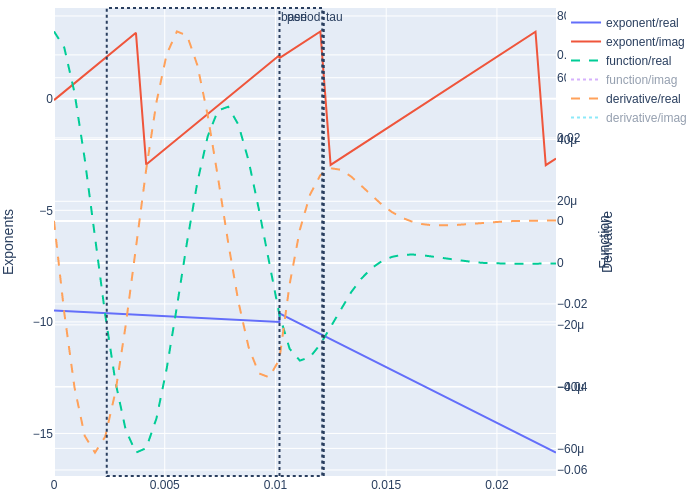

In [7]:
# Euler's function exponent diagram

# Figure with canvas
fig = go.Figure(**DEF_FIGURE)
fig_canvas(omega, phase, shock_t)
draw_euler(fig)
fig.show()